In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
#Normalized Mutual Information (NMI) is a normalization of the Mutual Information (MI)
#score to scale the results between 0 (no mutual information) and 1 (perfect correlation).

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# count the number of 0 and 1 values in the 'column_name' column
counts = df['HeartDiseaseorAttack'].value_counts()
counts

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [4]:
# Calculate the entropy of the response variable
response_entropy = mutual_info_score(df['HeartDiseaseorAttack'], df['HeartDiseaseorAttack'])

# Calculate the conditional entropy of each of the other columns given the response variable
conditional_entropy = {}
for col in df.columns:
    if col != 'HeartDiseaseorAttack':
        conditional_entropy[col] = mutual_info_score(df['HeartDiseaseorAttack'], df[col])
    
# Sort the conditional entropy values from lowest to highest
sorted_conditional_entropy = sorted(conditional_entropy.items(), key=lambda x: x[1])

# Print the entropy and conditional entropy values in sorted order
print("Response Entropy: ", response_entropy)
for col, entropy in sorted_conditional_entropy:
    print(col, " Conditional Entropy: ", entropy)

Response Entropy:  0.3121162513951302
AnyHealthcare  Conditional Entropy:  0.0001901782357081952
Fruits  Conditional Entropy:  0.00019396888263825685
NoDocbcCost  Conditional Entropy:  0.00044480816857509625
HvyAlcoholConsump  Conditional Entropy:  0.0004742529069711558
Veggies  Conditional Entropy:  0.0007280119892389691
CholCheck  Conditional Entropy:  0.0012978202661435073
MentHlth  Conditional Entropy:  0.002298306034762454
BMI  Conditional Entropy:  0.0025121611441536454
PhysActivity  Conditional Entropy:  0.0035234474524507287
Sex  Conditional Entropy:  0.0036754831004163907
Education  Conditional Entropy:  0.004835050658821635
Smoker  Conditional Entropy:  0.006514901035762494
Income  Conditional Entropy:  0.010152193778030682
Stroke  Conditional Entropy:  0.013022112343352474
Diabetes  Conditional Entropy:  0.013049920231963882
PhysHlth  Conditional Entropy:  0.014374903508354232
HighChol  Conditional Entropy:  0.016285095509136385
DiffWalk  Conditional Entropy:  0.018124718146

In [5]:

# Calculate the conditional entropy of each of the other columns given the response variable
nor_conditional_entropy = {}
for col in df.columns:
    if col != 'HeartDiseaseorAttack':
        nor_conditional_entropy[col] = normalized_mutual_info_score(df['HeartDiseaseorAttack'], df[col])

# Sort the conditional entropy values from lowest to highest
sorted_nor_conditional_entropy = sorted(nor_conditional_entropy.items(), key=lambda x: x[1])

# Print the entropy and conditional entropy values in sorted order
for col, entropy in sorted_nor_conditional_entropy:
    print(col, " normalized Conditional Entropy: ", entropy)

Fruits  normalized Conditional Entropy:  0.0004004444312023553
AnyHealthcare  normalized Conditional Entropy:  0.0007494402925341766
BMI  normalized Conditional Entropy:  0.001455497500278799
NoDocbcCost  normalized Conditional Entropy:  0.0014802997247825315
HvyAlcoholConsump  normalized Conditional Entropy:  0.0017947529320284856
Veggies  normalized Conditional Entropy:  0.0018285469210745572
MentHlth  normalized Conditional Entropy:  0.0027226764893716355
CholCheck  normalized Conditional Entropy:  0.005505283356770339
Education  normalized Conditional Entropy:  0.006157131455408433
Sex  normalized Conditional Entropy:  0.0073647505768675995
PhysActivity  normalized Conditional Entropy:  0.00812652325353113
Income  normalized Conditional Entropy:  0.009502390642881641
Smoker  normalized Conditional Entropy:  0.013045589514661698
PhysHlth  normalized Conditional Entropy:  0.015252458114647838
Age  normalized Conditional Entropy:  0.020539920042180245
Diabetes  normalized Conditional 

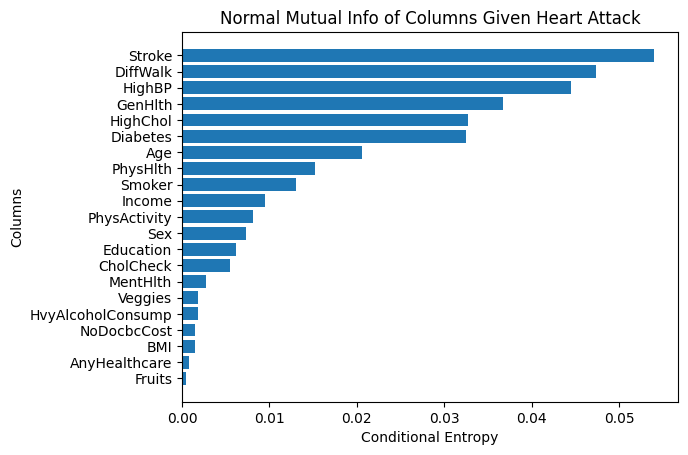

In [6]:
# Create a bar plot of the conditional entropy values in sorted order
cols = [col for col, entropy in sorted_nor_conditional_entropy]
entropies = [entropy for col, entropy in sorted_nor_conditional_entropy]
plt.barh(range(len(entropies)), entropies)
plt.yticks(range(len(cols)), cols)
plt.xlabel('Conditional Entropy')
plt.ylabel('Columns')
plt.title('Normal Mutual Info of Columns Given Heart Attack')
plt.show()

In [7]:
# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
data_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(data_scaled, columns=df.columns)

In [8]:
#scaled entropy
# Calculate the conditional entropy of each of the other columns given the response variable
conditional_entropy_scaled = {}
for col in scaled_df.columns:
    if col != 'HeartDiseaseorAttack':
        conditional_entropy_scaled[col] = mutual_info_score(scaled_df['HeartDiseaseorAttack'], scaled_df[col])
        
# Sort the conditional entropy values from lowest to highest
sorted_conditional_entropy_scaled = sorted(conditional_entropy_scaled.items(), key=lambda x: x[1])

# Print the entropy and conditional entropy values in sorted order
for col, entropy in sorted_conditional_entropy_scaled:
    print(col, " Conditional Entropy: ", entropy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\ProgramDa

AnyHealthcare  Conditional Entropy:  0.0001901782357081952
Fruits  Conditional Entropy:  0.00019396888263825685
NoDocbcCost  Conditional Entropy:  0.00044480816857509625
HvyAlcoholConsump  Conditional Entropy:  0.0004742529069711558
Veggies  Conditional Entropy:  0.0007280119892389691
CholCheck  Conditional Entropy:  0.0012978202661435073
MentHlth  Conditional Entropy:  0.002298306034762454
BMI  Conditional Entropy:  0.0025121611441536454
PhysActivity  Conditional Entropy:  0.0035234474524507287
Sex  Conditional Entropy:  0.0036754831004163907
Education  Conditional Entropy:  0.004835050658821635
Smoker  Conditional Entropy:  0.006514901035762494
Income  Conditional Entropy:  0.010152193778030682
Stroke  Conditional Entropy:  0.013022112343352474
Diabetes  Conditional Entropy:  0.013049920231963882
PhysHlth  Conditional Entropy:  0.014374903508354232
HighChol  Conditional Entropy:  0.016285095509136385
DiffWalk  Conditional Entropy:  0.01812471814600672
HighBP  Conditional Entropy:  0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [9]:
# split the data into features (X) and target (y)
#X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']
X = df[["Stroke","DiffWalk","HighBP","GenHlth"]]
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(data_scaled, columns=df.columns)

# split the data into features (X) and target (y)
X_scaled = scaled_df.drop('HeartDiseaseorAttack', axis=1)
y_scaled = scaled_df['HeartDiseaseorAttack']

# split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [10]:
# adjust the class weights
class_weights = {0: 0.25, 1: 0.75}

# fit a logistic regression model with the adjusted class weights using statsmodels
nX = sm.add_constant(X)
model = sm.Logit(y, nX, class_weight=class_weights)
result = model.fit()

# print the coefficient estimates and p-values
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['class_weight']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully.
         Current function value: 0.262821
         Iterations 7


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['class_weight']
  warnings.warn(msg, ValueWarning)


                            Logit Regression Results                            
Dep. Variable:     HeartDiseaseorAttack   No. Observations:               253680
Model:                            Logit   Df Residuals:                   253675
Method:                             MLE   Df Model:                            4
Date:                  Fri, 21 Apr 2023   Pseudo R-squ.:                  0.1579
Time:                          13:23:41   Log-Likelihood:                -66672.
converged:                         True   LL-Null:                       -79178.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6587      0.025   -188.425      0.000      -4.707      -4.610
Stroke         1.1983      0.024     50.762      0.000       1.152       1.245
DiffWalk       0.4394      0.017    

In [11]:
# create a logistic regression model
model = LogisticRegression(class_weight = {0:19, 1:81}, max_iter = 1000)

# fit the model to the training data
model.fit(X_train, y_train)

# evaluate the model on the testing data
accuracy = model.score(X_test, y_test)

# display the accuracy
print(accuracy)

0.8523336486912646


In [12]:
y_pred = model.predict(X_test) 

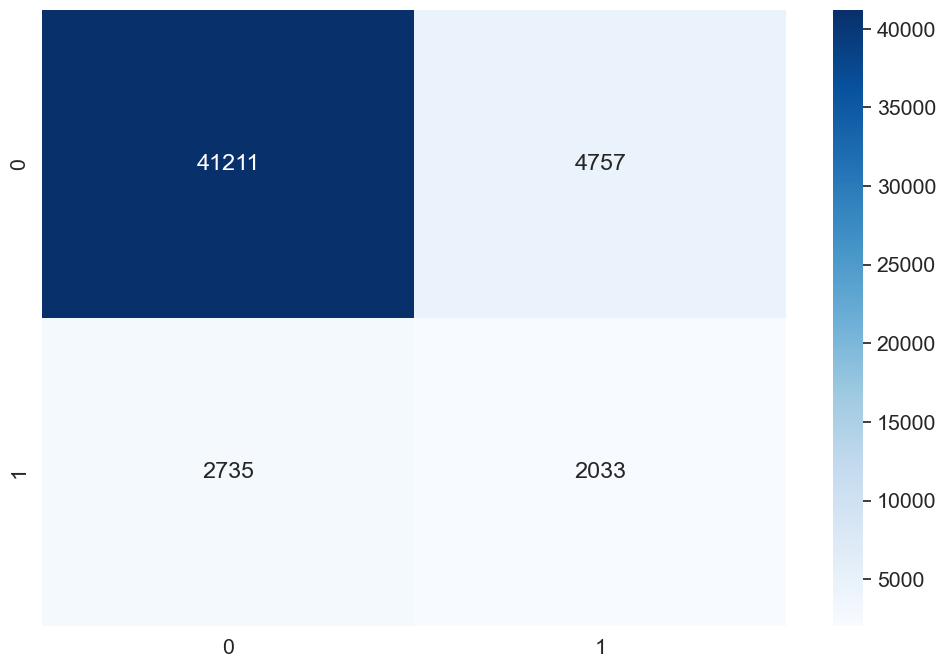

In [13]:
logreg_conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize = (12,8)) 
sns.set(font_scale=1.4)
ax = sns.heatmap(logreg_conf_matrix,cmap='Blues',annot=True, fmt='d')